# 9: Adaptive methods.

Up to this point, our methods have operated with a fixed step-size $h$.
**Adaptive methods** incorporate a procedure to adjust the step-size in an attempt to keep the truncation error under control.
When we use numerical methods in practice, however, we typically cannot solve for the true solution exactly, and so it is impossible to compute the error.
Adaptive methods, therefore, incorporate some procedure to estimate the local truncation error at each step.  

## Estimating the unknown.

Here we give a description of how adaptive methods estimate local truncation error – something that is typically unknowable.
As we will see, the basic idea is to use a second numerical method of one higher order of accuracy.
Suppose that we have 2 methods for numerically integrating an ODE.
For simplicity, we assume that both are single step methods.
We assume that the first method takes the form
\begin{equation*}
y_{i+1} = y_i + h\phi_1(x_i, y_i, h),
\end{equation*}
while the second takes the form
\begin{equation*}
\hat{y_{i+1}} = \hat{y_i} + h\phi_2(x_i,\hat{y_i}, h).
\end{equation*}
Furthermore, we assume that the first method has local truncation error $l_{i+1}=O(h^{p+1})$  while the second is $\hat{l_{i+1}}=O(h^{p+2})$, i.e., if $y$ is the true solution, then we have
\begin{align*}
y(x_{i+1}) &= y(x_i) + h\phi_1(x_i, y(x_i), h) + O(h^{p+1}),\\
y(x_{i+1}) &= y(x_i) + h\phi_2(x_i, y(x_i), h) + O(h^{p+2}).
\end{align*}
Since we are interested in the local truncation error, we assume that previous step was exact, i.e., we assume $y_i = y(x_i) = \hat{y_i}$ exactly.
Then the local truncation error for the first method is
\begin{equation*}
l_{i+1} = y(x_{i+1}) - y_i - h\phi_1(x_i, y_i, h) 
= y(x_{i+1}) - y_{i+1}
\end{equation*}
while the local truncation error for the second method is
\begin{equation*}
\hat{l_{i+1}} = y(x_{i+1}) - \hat{y_i} - h\phi_1(x_i, \hat{y_i}, h) 
= y(x_{i+1}) - \hat{y_{i+1}},
\end{equation*}
and so
\begin{equation*}
l_{i+1} = \hat{l_{i+1}} + (\hat{y_{i+1}} - y_{i+1}).
\end{equation*}
However, since $l_{i+1} = O(h^{p+1})$ and $\hat{l_{i+1}} = O(h^{p+2})$, it is reasonable to assume that the local truncation error for the first (lower order) method
\begin{equation*}
l_{i+1}\approx \hat{y_{i+1}} - y_{i+1}
\end{equation*}
when $h$ is small. 

## Controlling error.

Treating the truncation error as a function of $h$, we assume that $l_{i+1}(h) \approx K h^{p+1}$ for some constant $K$.
Suppose then that we are willing to adjust the step size from $h$ to $\delta h$ so as to keep the average local truncation error under some tolerance $\epsilon$, i.e., we want to choose $\delta$ so that
\begin{equation*}
\left|\frac{l_{i+1}(\delta h)}{\delta h}\right|\le \epsilon.
\end{equation*}
Observing that our assumptions imply that 
\begin{equation*}
l_{i+1}(\delta h) \approx K(\delta h)^{p+1} \approx \delta^{p+1} l_{i+1}(h) \approx \delta^{p+1}|\hat{y_{i+1}} - y_{i+1}|
\end{equation*}
and solving for $\delta$, we have
\begin{equation*}
\delta\le \left(\frac{\epsilon h}{|\hat{y_{i+1}} - y_{i+1}|}\right)^{1/p}.
\end{equation*}
In practice, $\delta$ is usually chosen somewhat more conservatively since there is a "work" penalty to be paid every time that the step has to be repeated with a smaller step-size.

## Advantages and disadvantages.

An adaptive method offers the advantage of being able to estimate the local truncation error at each step of the algorithm and adjust the step size $h_i$ to control the estimated error.
The major disadvantages are that adaptive methods are typically more computationally expensive, and they are typically much harder to implement than non-adaptive methods. 

## Runge–Kutta–Fehlberg and Dormand–Prince.

One popular adaptive method employing this scheme is the **Runge-Kutta-Fehlberg method (RKF45)**, which uses a 4th order Runge-Kutta method (but not _the_ RK4) together with a 5th order Runge-Kutta method to estimate and control the error.
The two methods were chosen so as to share as many of the evaluations of the right-hand side $f(x,y)$ as possible.
In general, an order 4 method requires 4 functional evaluations and an order 5 method requires another 6 for a total of 10.
The RKF45 method, however, requires only 6 total.

The **Dormand–Prince method** works similarly to RKF45, employing a different pair of 4th and 5th order Runge–Kutta formulas, but with the roles of the two methods reversed.
It is a "method of choice" available in several "off-the-shelf" libraries.
For example, it is implemented in SciPy under the name [RK45](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html#id1).

## Example.

As an example, we consider a two-body gravitational orbit problem which takes the form
```{math}
:label: two-body-problem
\ddot{\boldsymbol{r}} &= -\frac{\hat{\boldsymbol{r}}}{|\boldsymbol{r}|^2},\\
\boldsymbol{r}(0) & = \langle 1-e, 0\rangle,\\
\dot{\boldsymbol{r}}(0) &= \left\langle 0, \sqrt{\frac{(1+e)}{(1-e)}}\right\rangle,
```
where $\boldsymbol r$ represents the position (or radial) vector of one body relative to the other and we denote time-derivatives with the usual dot notation.
The initial conditions ensure that the orbit will have eccentricity $e$.

Since IVP {eq}`two-body-problem` is a second-order problem, we introduce the auxillary vector $\boldsymbol w = \langle \boldsymbol r,  \boldsymbol v\rangle$, where $\boldsymbol v = \dot{\boldsymbol r}$ is the velocity vector for one body relative to the other.
We then rewrite the second-order ODE as the first-order ODE
```{math}
:label: 1st-order-vector-ode
\dot{\boldsymbol w} 
=\begin{pmatrix}\dot{\boldsymbol r}\\ \dot{\boldsymbol v}\end{pmatrix}
=\begin{pmatrix}\boldsymbol v \\ -\frac{\hat{\boldsymbol{r}}}{|\boldsymbol{r}|^2}\end{pmatrix}.
```
Since we may assume that both bodies reside in a common plane, we may write 
$\boldsymbol w = \langle w_0, w_1, w_2, w_3\rangle$, where 
\begin{align*}
\boldsymbol r &= \langle x, y\rangle = \langle w_0, w_1\rangle,\\
\boldsymbol v &= \langle \dot x, \dot y\rangle = \langle w_2, w_3\rangle.
\end{align*}
We then rewrite the vector ODE {eq}`1st-order-vector-ode` as the scalar system
\begin{align*}
\dot{w_0} &= w_2,\\
\dot{w_1} &= w_3,\\
\dot{w_2} &= -w_0/(w_0^2+w_1^2)^{3/2},\\
\dot{w_3} &= -w_1/(w_0^2+w_1^2)^{3/2},\\
\end{align*}

We now numerically solve this problem over the time-interval $[0, 10]$ using SciPy's implementation of the Dormand-Prince method for the case when the eccentricity $e = 0.9$.
With the default settings, the implementation aims to keep the estimated relative error below $10^{-3}$ and the estimated absolute error below $10^{-6}$.

Dormand-Prince method successfully reached end of time span.
End of time-interval [0, 10] reached in n = 76 time-steps.
Displaying results for first 10 steps.
┍━━━━━┯━━━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━┑
│   i │     t_i │      x_i │     y_i │     x_i' │    y_i' │
┝━━━━━┿━━━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━┥
│   0 │ 0.00000 │  0.10000 │ 0.00000 │  0.00000 │ 4.35890 │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│   1 │ 0.00643 │  0.09796 │ 0.02785 │ -0.62732 │ 4.27146 │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│   2 │ 0.01264 │  0.09238 │ 0.05372 │ -1.15321 │ 4.04799 │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│   3 │ 0.01963 │  0.08264 │ 0.08087 │ -1.60459 │ 3.70439 │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│   4 │ 0.02771 │  0.06820 │ 0.10906 │ -1.94517 │ 3.28108 │
├─────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│   5 │ 0.03705 │  0.04889 │ 0.13757 │ -2.16169 │ 2.83304 │
├

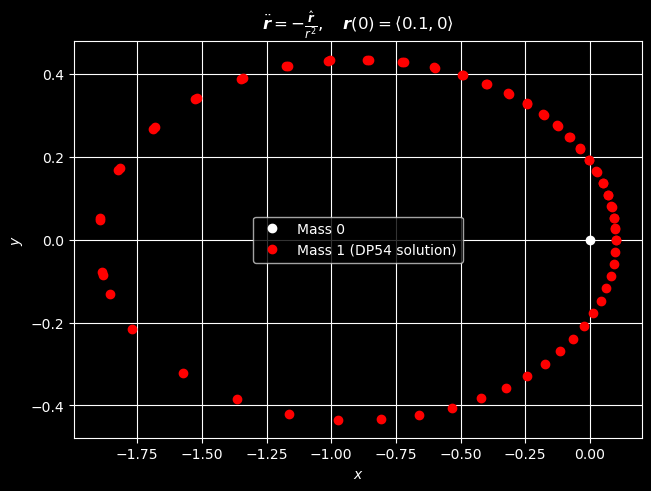

In [ ]:
# import modules
import numpy
from matplotlib import pyplot
from numpy import sqrt
from numpy.linalg import norm
from scipy.integrate import solve_ivp
from tabulate import tabulate


# define IVP parameters
# r = <x, y>, v = r', a = v'
# w = <r, v>
# w' = <r', v'> = <v, a> = <v, -r/|r|^3>
def f(t, w):
    r = w[:2]
    v = w[2:]
    a = -r / norm(r, 2) ** 3
    return numpy.concat((v, a))


e = 0.9
w0 = numpy.array([1 - e, 0, 0, sqrt((1 + e) / (1 - e))])
a, b = 0, 10

pyplot.style.use("dark_background")
fig, ax = pyplot.subplots(layout="constrained")

# numerically solve IVP with Dormand-Prince (RK45)
dp54_soln = solve_ivp(f, [a, b], w0, method="RK45", rtol=10**-6)
if dp54_soln.status:
    print("Dormand-Prince method failed.")
else:
    print("Dormand-Prince method successfully reached end of time span.")
    # extract time-steps
    ti = dp54_soln.t
    n = len(ti)
    wi = dp54_soln.y
    # extract radial vectors
    ri = wi[:2]
    # extract velocity vectors
    vi = wi[-2:]
    print(f"End of time-interval [{a}, {b}] reached in n = {n} time-steps.")
    T = min(10, n)
    print(f"Displaying results for first {T} steps.")
    data = numpy.c_[ti[:T], ri[0, :T], ri[1, :T], vi[0, :T], vi[1, :T]]
    hdrs = ["i", "t_i", "x_i", "y_i", "x_i'", "y_i'"]
    print(tabulate(data, hdrs, showindex=True, floatfmt="0.5f", tablefmt="mixed_grid"))
    print("Plotting solution in spatial domain (xy-plane).")
    ax.plot(0, 0, "wo", label="Mass 0")
    ax.plot(ri[0], ri[1], "ro", label="Mass 1 (DP54 solution)")
    ax.set_title(
        r"$\ddot{\boldsymbol{r}} = -\frac{\hat{\boldsymbol{r}}}{r^2},\quad \boldsymbol{r}(0) = \langle 0.1, 0\rangle$"
    )
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.legend()
    ax.grid(True)
    pyplot.show()